In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
data = pd.read_csv('songs_normalize.csv')
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [47]:
#affiche les différentes colonnes et leur type
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


(2000, 18)

In [48]:
#affiche juste les noms des colonnes
data.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [49]:
#affiche le nombre de données manquant par colonne
data.isnull().sum()


artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [50]:
#changez le nom de 'song' en 'track_name'
data = data.rename(columns={'song': 'track_name'})

#changez le nom de artist en artists
data = data.rename(columns={'artist': 'artists'})

#changez le nom de 'track_genre' en 'genre
data = data.rename(columns={'genre': 'track_genre'})


In [51]:
#affiche la ligne qui contient des données manquantes
data[data.isnull().any(axis=1)]

,artists,track_name,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre


In [52]:
#supprime les doublons si l'artist et le track_name sont les mêmes
data = data.drop_duplicates(subset=['artists', 'track_name'])

In [53]:
#top 5 des musiques avec le plus de speechiness
data.nlargest(5, 'speechiness')

,artists,track_name,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
736,MiMS,This Is Why I'm Hot,253706,True,2007,59,0.621,0.600,8,-6.349,1,0.576,0.2770,0.0,0.4950,0.485,80.021,"hip hop, pop"
1856,Lil Baby,Yes Indeed,142273,True,2018,79,0.963,0.346,5,-9.309,0,0.530,0.0355,0.0,0.1080,0.562,119.957,hip hop
1863,Eminem,River (feat. Ed Sheeran),221013,True,2017,72,0.748,0.749,8,-5.916,0,0.516,0.1420,0.0,0.0713,0.659,90.090,hip hop
355,Missy Elliott,Gossip Folks (feat. Ludacris),234893,True,2002,57,0.707,0.538,0,-5.264,1,0.505,0.3620,0.0,0.3170,0.439,121.732,"hip hop, pop, R&B"
159,Afroman,Because I Got High,197760,True,2001,68,0.802,0.341,7,-8.560,1,0.488,0.1690,0.0,0.0783,0.849,166.010,hip hop


In [54]:
#top 5 des musiques les plus populaires
data.nlargest(5, 'popularity')


,artists,track_name,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"


In [55]:
#affiche tout les les sons avec le track_name Comedy
data[data['track_name'] == 'Comedy']

,artists,track_name,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre


In [56]:
#affiche le nombre de colonne et de ligne
data.shape

(1926, 18)

In [57]:
# Configuration initiale pour les graphiques
plt.rcParams["figure.figsize"] = (10, 6)

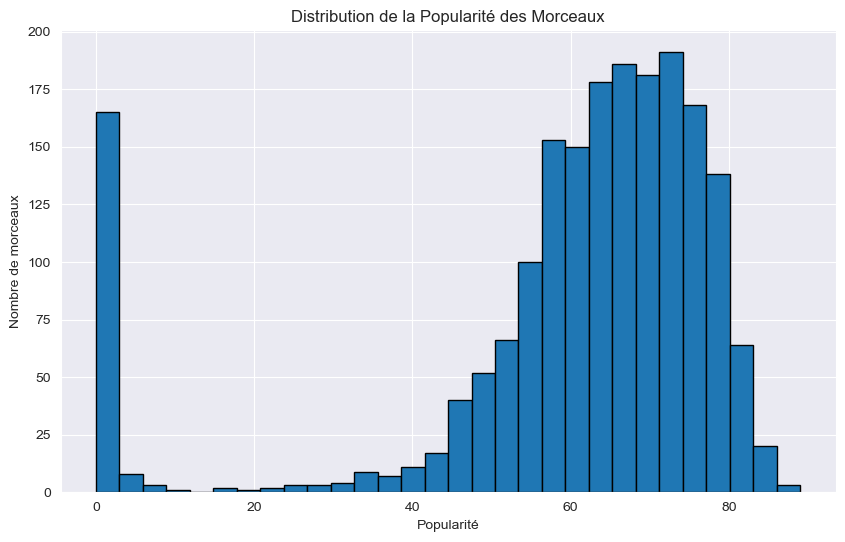

In [58]:
# Distribution de la popularité des morceaux
plt.hist(data['popularity'], bins=30, edgecolor='k')
plt.title('Distribution de la Popularité des Morceaux')
plt.xlabel('Popularité')
plt.ylabel('Nombre de morceaux')
plt.show()

In [59]:
#affiche les morceaux du plus populaire au moins populaire
data.sort_values('popularity', ascending=False).head(10)

,artists,track_name,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1512,The Neighbourhood,Daddy Issues,260173,False,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"
1709,Ed Sheeran,Perfect,263400,False,2017,85,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,pop


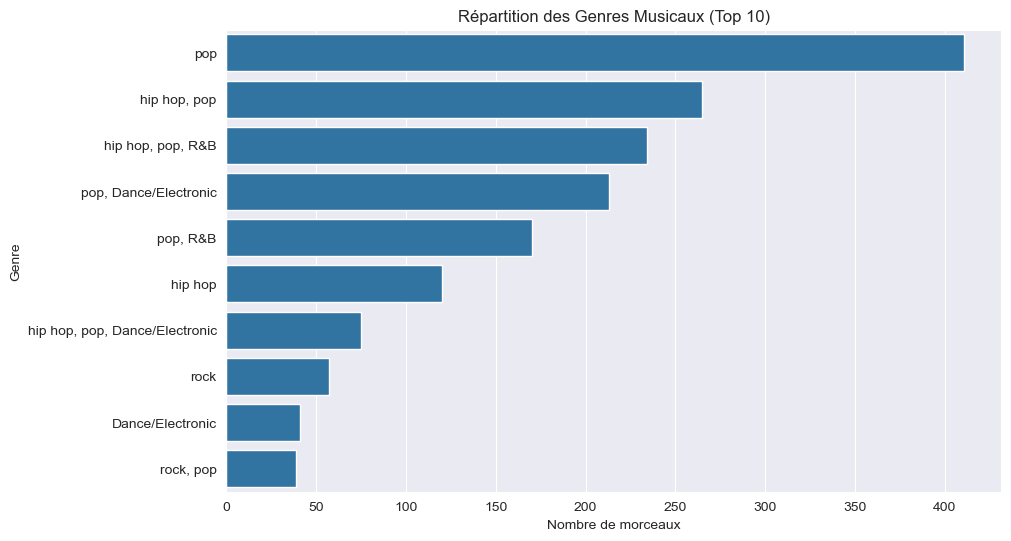

In [60]:
# Répartition des genres musicaux (Top 10 genres les plus fréquents)
top_genres = data['track_genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, orient='h')
plt.title('Répartition des Genres Musicaux (Top 10)')
plt.xlabel('Nombre de morceaux')
plt.ylabel('Genre')
plt.show()

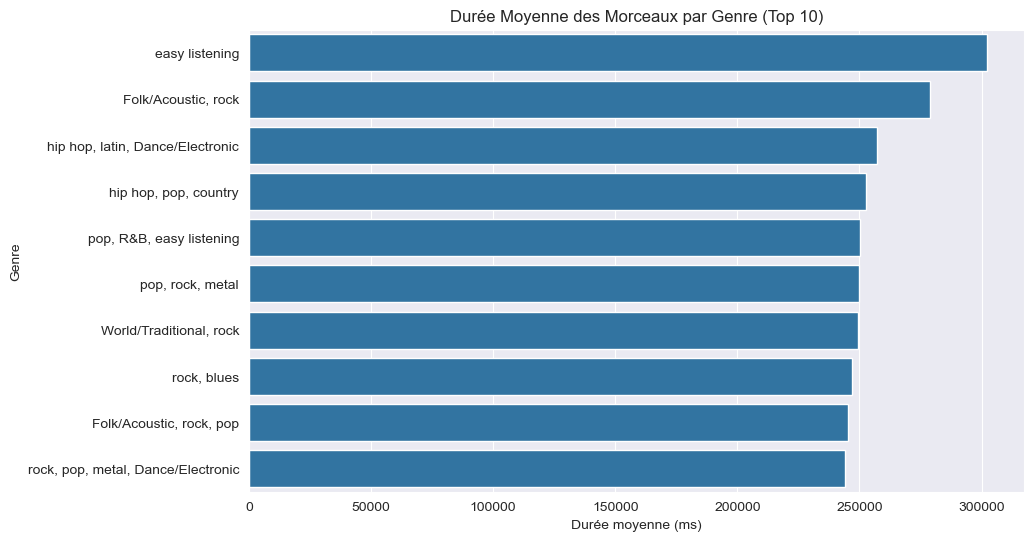

In [61]:
# Durée moyenne des morceaux par genre (Top 10 genres)
avg_duration_by_genre = data.groupby('track_genre')['duration_ms'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_duration_by_genre.values, y=avg_duration_by_genre.index, orient='h')
plt.title('Durée Moyenne des Morceaux par Genre (Top 10)')
plt.xlabel('Durée moyenne (ms)')
plt.ylabel('Genre')
plt.show()


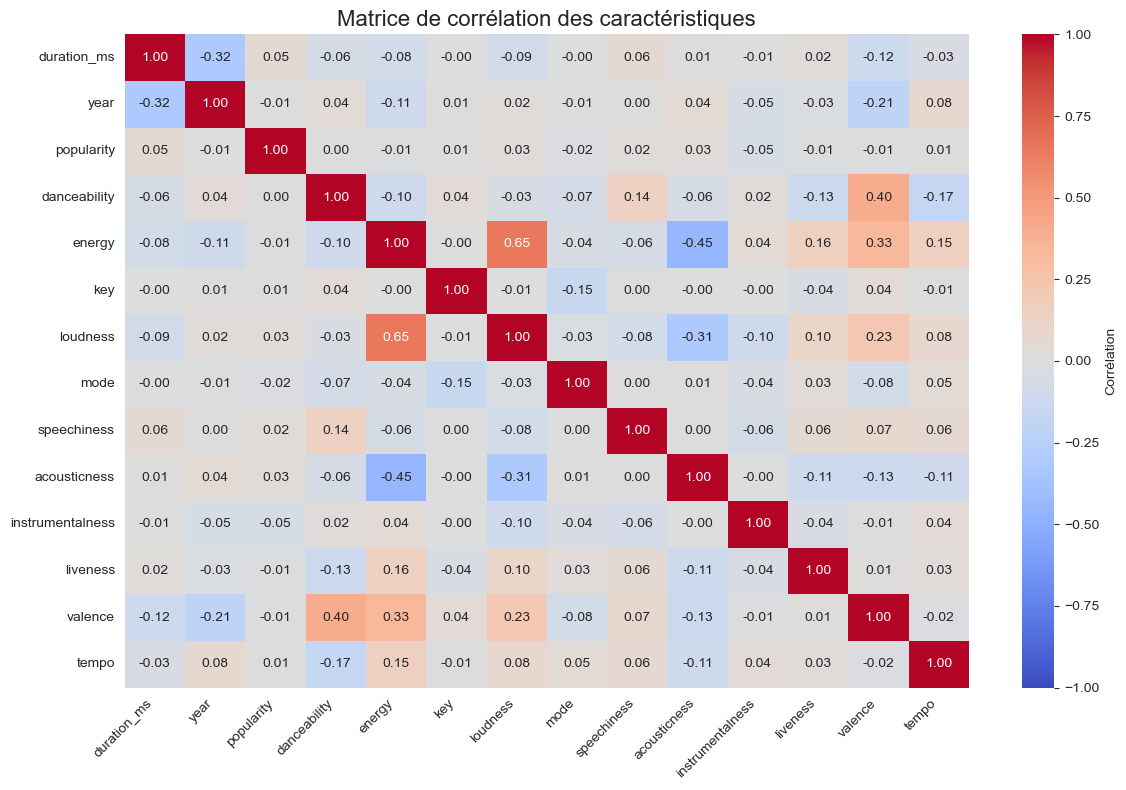

Corrélations avec Popularité :

popularity          1.000000
duration_ms         0.049497
loudness            0.028208
acousticness        0.025813
speechiness         0.022345
key                 0.014811
tempo               0.010864
danceability        0.000590
year               -0.005000
valence            -0.010005
liveness           -0.010702
energy             -0.014984
mode               -0.019105
instrumentalness   -0.048675
Name: popularity, dtype: float64


In [62]:
numeric_data = data.select_dtypes(include=["number"])

# Calculer la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Création de la heatmap avec des labels lisibles
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,               # Affiche les valeurs dans chaque cellule
    fmt=".2f",                # Format des valeurs (deux décimales)
    cmap="coolwarm",          # Palette de couleurs
    vmin=-1, vmax=1,          # Intervalle des valeurs
    cbar_kws={"label": "Corrélation"},  # Label pour la barre de couleur
    xticklabels=correlation_matrix.columns,  # Labels des colonnes
    yticklabels=correlation_matrix.columns   # Labels des lignes
)

# Titre et ajustements
plt.title("Matrice de corrélation des caractéristiques", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotation des labels des colonnes
plt.yticks(fontsize=10)  # Taille des labels des lignes
plt.tight_layout()       # Ajuste automatiquement les marges
plt.show()

# Afficher uniquement les corrélations avec "popularity"
popularity_corr = correlation_matrix["popularity"].sort_values(ascending=False)
print("Corrélations avec Popularité :\n")
print(popularity_corr)


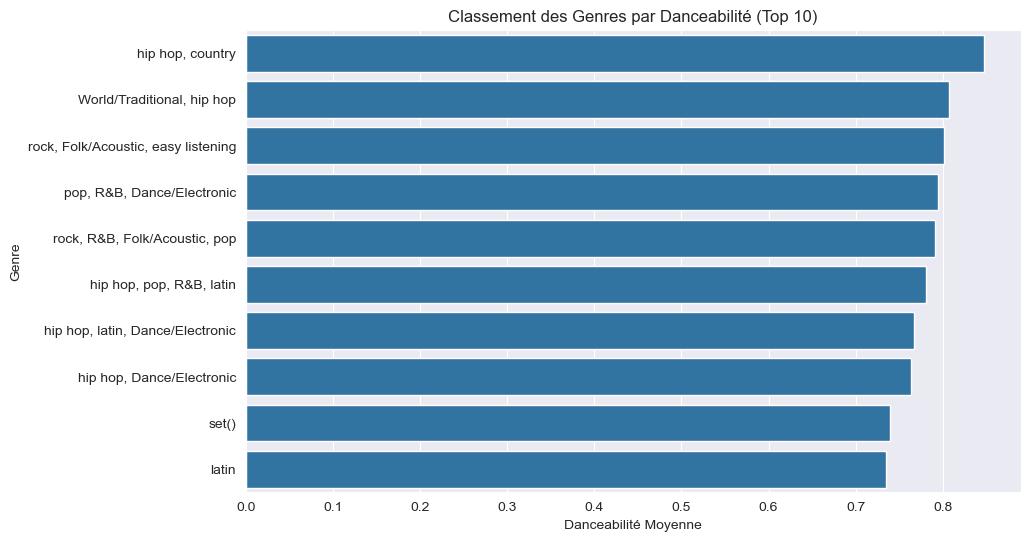

In [63]:
# Classement des genres par danceabilité
avg_danceability_by_genre = data.groupby('track_genre')['danceability'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_danceability_by_genre.values, y=avg_danceability_by_genre.index, orient='h')
plt.title('Classement des Genres par Danceabilité (Top 10)')
plt.xlabel('Danceabilité Moyenne')
plt.ylabel('Genre')
plt.show()


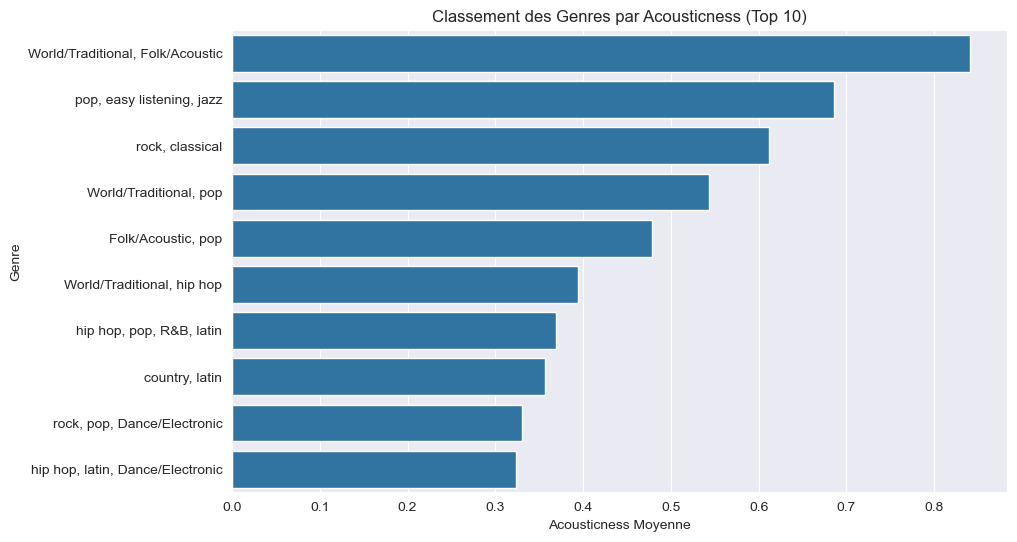

In [64]:
# Classement des genres par acousticness
avg_acousticness_by_genre = data.groupby('track_genre')['acousticness'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_acousticness_by_genre.values, y=avg_acousticness_by_genre.index, orient='h')
plt.title('Classement des Genres par Acousticness (Top 10)')
plt.xlabel('Acousticness Moyenne')
plt.ylabel('Genre')
plt.show()

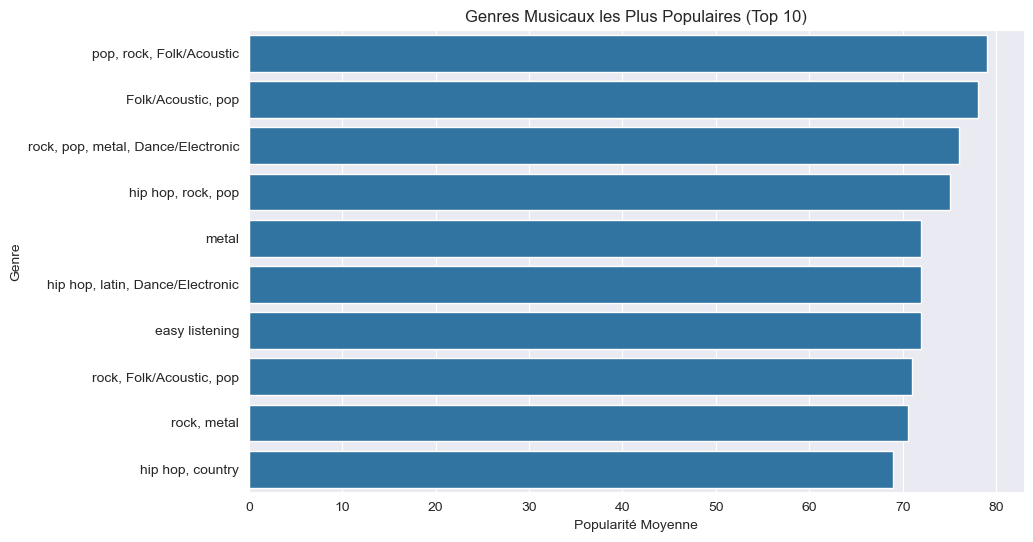

In [65]:
# Quels sont les genres musicaux les plus populaires ?
top_genres_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres_popularity.values, y=top_genres_popularity.index, orient='h')
plt.title('Genres Musicaux les Plus Populaires (Top 10)')
plt.xlabel('Popularité Moyenne')
plt.ylabel('Genre')
plt.show()

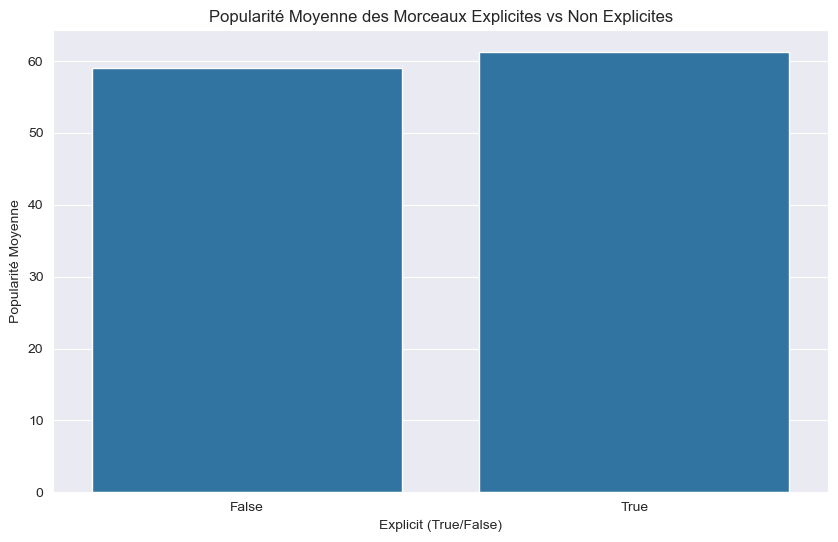

In [66]:
# Les morceaux explicites sont-ils généralement plus populaires ?
explicit_popularity = data.groupby('explicit')['popularity'].mean()
sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values)
plt.title('Popularité Moyenne des Morceaux Explicites vs Non Explicites')
plt.xlabel('Explicit (True/False)')
plt.ylabel('Popularité Moyenne')
plt.show()

C:\Users\kheir\AppData\Local\Temp\ipykernel_22736\333005390.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_popularity = data.groupby('duration_category')['popularity'].mean()


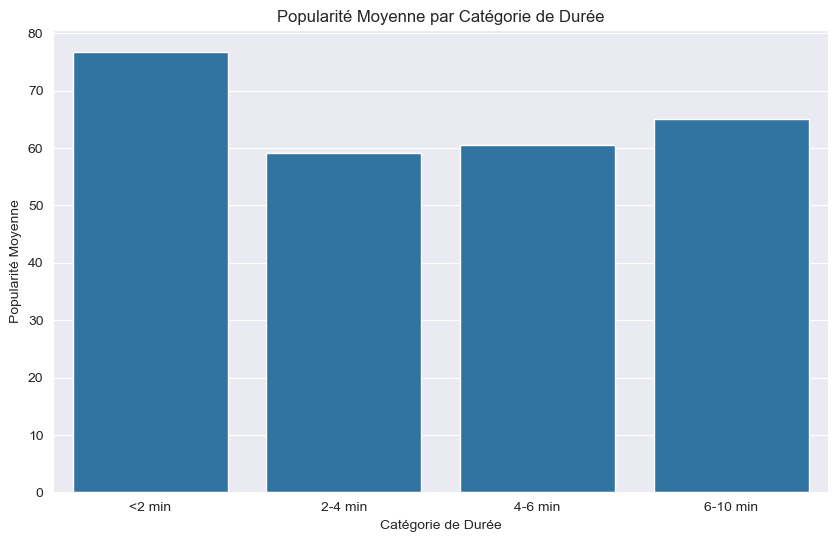

In [67]:
# Les morceaux avec une durée spécifique (2-4 minutes) ont-ils tendance à être plus populaires ?
# Ajouter une colonne de catégorie pour la durée des morceaux
data['duration_category'] = pd.cut(data['duration_ms'] / 60000, bins=[0, 2, 4, 6, 10], labels=['<2 min', '2-4 min', '4-6 min', '6-10 min'])
duration_popularity = data.groupby('duration_category')['popularity'].mean()
sns.barplot(x=duration_popularity.index, y=duration_popularity.values)
plt.title('Popularité Moyenne par Catégorie de Durée')
plt.xlabel('Catégorie de Durée')
plt.ylabel('Popularité Moyenne')
plt.show()

C:\Users\kheir\AppData\Local\Temp\ipykernel_22736\1124061387.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tempo_popularity = data.groupby(['track_genre', 'tempo_category'])['popularity'].mean().unstack()


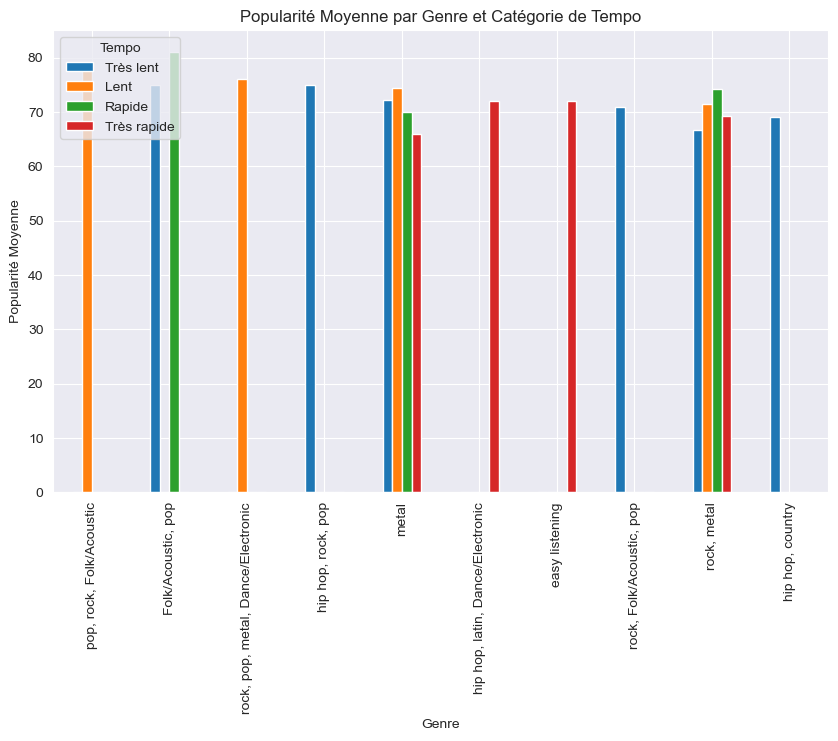

In [68]:
# si le tempo est plus élevé, la popularité est-elle plus élevée pour chaque genre en prenant seulement 25% des morceaux les plus populaires
# Ajouter une colonne de catégorie pour le tempo
data['tempo_category'] = pd.qcut(data['tempo'], q=4, labels=['Très lent', 'Lent', 'Rapide', 'Très rapide'])
tempo_popularity = data.groupby(['track_genre', 'tempo_category'])['popularity'].mean().unstack()
tempo_popularity = tempo_popularity.loc[top_genres_popularity.index]
tempo_popularity.plot(kind='bar')
plt.title('Popularité Moyenne par Genre et Catégorie de Tempo')
plt.xlabel('Genre')
plt.ylabel('Popularité Moyenne')
plt.legend(title='Tempo')
plt.show()

C:\Users\kheir\AppData\Local\Temp\ipykernel_22736\2412742335.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tempo_popularity = data.groupby('tempo_category')['popularity'].mean()


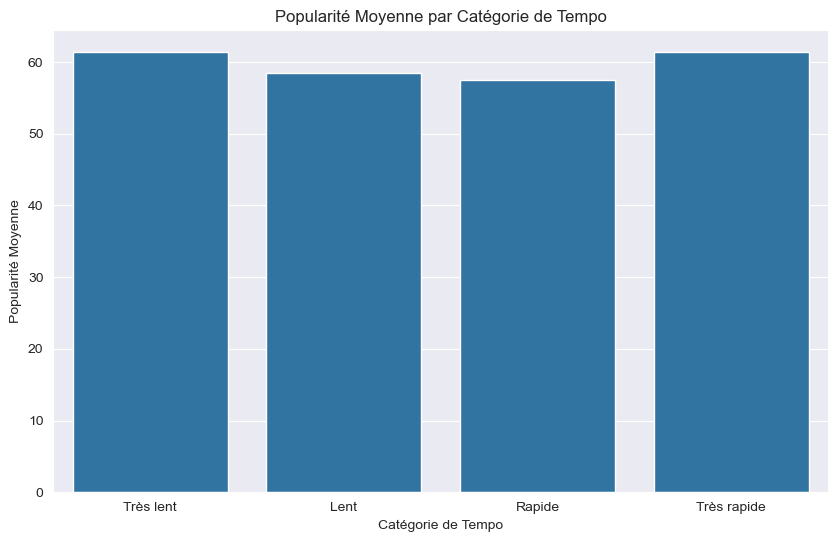

In [69]:
#regrouper les musiques par tempo et afficher la popularité moyenne pour 25% des musiques les plus populaires
tempo_popularity = data.groupby('tempo_category')['popularity'].mean()
sns.barplot(x=tempo_popularity.index, y=tempo_popularity.values)
plt.title('Popularité Moyenne par Catégorie de Tempo')
plt.xlabel('Catégorie de Tempo')
plt.ylabel('Popularité Moyenne')
plt.show()


Text(0, 0.5, 'Artiste')

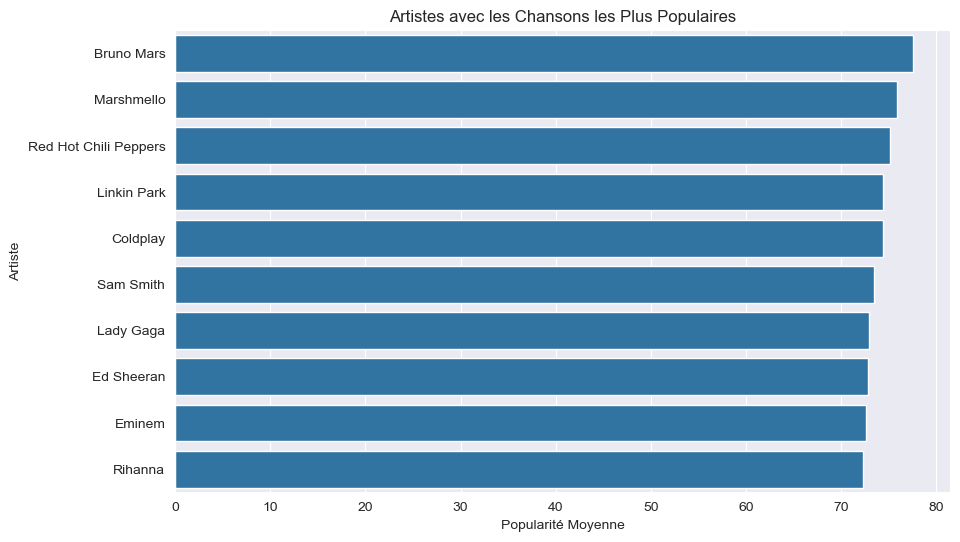

In [70]:
#Identifier les artistes ayant les chansons les plus populaires en calculant la popularité moyenne par artists tout en ayant + de 5 chansons
popular_artists = data.groupby('artists').filter(lambda x: len(x) > 5).groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=popular_artists.values, y=popular_artists.index, orient='h')
plt.title('Artistes avec les Chansons les Plus Populaires')
plt.xlabel('Popularité Moyenne')
plt.ylabel('Artiste')


In [84]:
#Utiliser les colonnes audio (danceability, energy, etc.) et les métadonnées (genre, explicit, etc.) comme variables indépendantes pour prédire la popularity pour chaque genre de musique
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Variables indépendantes (X) et dépendante (y)
X = data[
	['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
	 'explicit', 'year']]
y = data['popularity']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
print(f"R² (Régression Linéaire) = {r2:.2f}")

R² (Régression Linéaire) = -0.00


In [85]:
#Régression Ridge ou Lasso pour réduire le surajustement
from sklearn.linear_model import Ridge, Lasso

# Création et entraînement du modèle de régression Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Prédiction et calcul du R²
y_pred_ridge = model_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² (Ridge) = {r2_ridge:.2f}")



R² (Ridge) = -0.00


In [86]:
#XGBoost pour améliorer la prédiction
from xgboost import XGBRegressor

X = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'explicit', 'year']]
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"R² (XGBoost) = {r2_xgb:.2f}")


R² (XGBoost) = -0.20


In [74]:
#lightgbm pour améliorer la prédiction
from lightgbm import LGBMRegressor

# Parcourir chaque genre unique
for genre in data['track_genre'].unique():
    # Filtrer les données pour le genre actuel
    genre_data = data[data['track_genre'] == genre]
    
    if len(genre_data) < 50:  
        print(f"Genre '{genre}' ignoré : Trop peu de données ({len(genre_data)} morceaux).")
        continue

    # Variables indépendantes (X) et dépendante (y)
    X = genre_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
    y = genre_data['popularity']

    # Séparation des données en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Création et entraînement du modèle LightGBM
    model_lgbm = LGBMRegressor()
    model_lgbm.fit(X_train, y_train)

    # Prédiction et calcul du R²
    y_pred_lgbm = model_lgbm.predict(X_test)
    r2_lgbm = r2_score(y_test, y_pred_lgbm)

    # Afficher le résultat pour le genre
    print(f"Genre: {genre}, R² (LightGBM) = {r2_lgbm:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 328, number of used features: 8
[LightGBM] [Info] Start training from score 59.368902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [75]:
#decision tree pour améliorer la prédiction
from sklearn.tree import DecisionTreeRegressor

# Parcourir chaque genre unique
for genre in data['track_genre'].unique():
    # Filtrer les données pour le genre actuel
    genre_data = data[data['track_genre'] == genre]
    
    if len(genre_data) < 50:  
        print(f"Genre '{genre}' ignoré : Trop peu de données ({len(genre_data)} morceaux).")
        continue

    # Variables indépendantes (X) et dépendante (y)
    X = genre_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
    y = genre_data['popularity']

    # Séparation des données en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Création et entraînement du modèle Arbre de Décision
    model_dt = DecisionTreeRegressor()
    model_dt.fit(X_train, y_train)

    # Prédiction et calcul du R²
    y_pred_dt = model_dt.predict(X_test)
    r2_dt = r2_score(y_test, y_pred_dt)

    # Afficher le résultat pour le genre
    print(f"Genre: {genre}, R² (Arbre de Décision) = {r2_dt:.2f}")
    
    

Genre: pop, R² (Arbre de Décision) = -0.93
Genre 'rock, pop' ignoré : Trop peu de données (39 morceaux).
Genre 'pop, country' ignoré : Trop peu de données (8 morceaux).
Genre 'rock, metal' ignoré : Trop peu de données (36 morceaux).
Genre: hip hop, pop, R&B, R² (Arbre de Décision) = -1.87
Genre: hip hop, R² (Arbre de Décision) = -0.22
Genre 'pop, rock' ignoré : Trop peu de données (26 morceaux).
Genre: pop, R&B, R² (Arbre de Décision) = -1.55
Genre 'Dance/Electronic' ignoré : Trop peu de données (41 morceaux).
Genre: pop, Dance/Electronic, R² (Arbre de Décision) = -1.40
Genre 'rock, Folk/Acoustic, easy listening' ignoré : Trop peu de données (1 morceaux).
Genre 'metal' ignoré : Trop peu de données (9 morceaux).
Genre: hip hop, pop, R² (Arbre de Décision) = -3.68
Genre 'R&B' ignoré : Trop peu de données (13 morceaux).
Genre 'pop, latin' ignoré : Trop peu de données (28 morceaux).
Genre 'Folk/Acoustic, rock' ignoré : Trop peu de données (1 morceaux).
Genre 'pop, easy listening, Dance/Ele

In [76]:
#affiche les valeurs null par colonne
data.isnull().sum()


artists              0
track_name           0
duration_ms          0
explicit             0
year                 0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
track_genre          0
duration_category    0
tempo_category       0
dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Stocker les résultats
genre_results = {}
genre_counts = {}

# Parcourir chaque genre unique
for genre in data['track_genre'].unique():
    genre_data = data[data['track_genre'] == genre]
    
    # Vérifier si le genre a suffisamment de données
    if len(genre_data) < 50:
        print(f"Genre '{genre}' ignoré : Trop peu de données ({len(genre_data)} morceaux).")
        continue

    # Compter les morceaux
    genre_counts[genre] = len(genre_data)

    # Variables indépendantes (X) et dépendante (y)
    X = genre_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
    y = genre_data['popularity']

    # Séparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modèle
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calcul du R²
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Enregistrer les résultats
    genre_results[genre] = {'model': model, 'r2': r2}

# Organiser les résultats dans un tableau
results_df = pd.DataFrame([
    {'Genre': genre, 'R²': genre_results[genre]['r2'], 'Taille': genre_counts[genre]}
    for genre in genre_results
]).sort_values(by='R²', ascending=False)

# Afficher les résultats
print(results_df)

Genre 'rock, pop' ignoré : Trop peu de données (39 morceaux).
Genre 'pop, country' ignoré : Trop peu de données (8 morceaux).
Genre 'rock, metal' ignoré : Trop peu de données (36 morceaux).
Genre 'pop, rock' ignoré : Trop peu de données (26 morceaux).
Genre 'Dance/Electronic' ignoré : Trop peu de données (41 morceaux).
Genre 'rock, Folk/Acoustic, easy listening' ignoré : Trop peu de données (1 morceaux).
Genre 'metal' ignoré : Trop peu de données (9 morceaux).
Genre 'R&B' ignoré : Trop peu de données (13 morceaux).
Genre 'pop, latin' ignoré : Trop peu de données (28 morceaux).
Genre 'Folk/Acoustic, rock' ignoré : Trop peu de données (1 morceaux).
Genre 'pop, easy listening, Dance/Electronic' ignoré : Trop peu de données (1 morceaux).
Genre 'rock, blues, latin' ignoré : Trop peu de données (2 morceaux).
Genre 'pop, rock, metal' ignoré : Trop peu de données (14 morceaux).
Genre 'rock, pop, metal' ignoré : Trop peu de données (4 morceaux).
Genre 'hip hop, R&B' ignoré : Trop peu de données

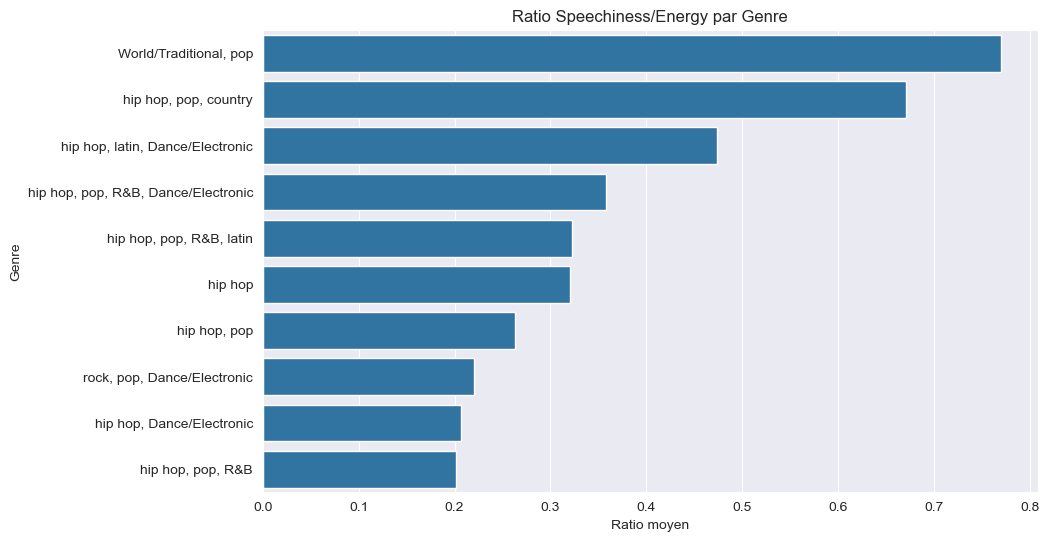

Text(0, 0.5, 'Genre')

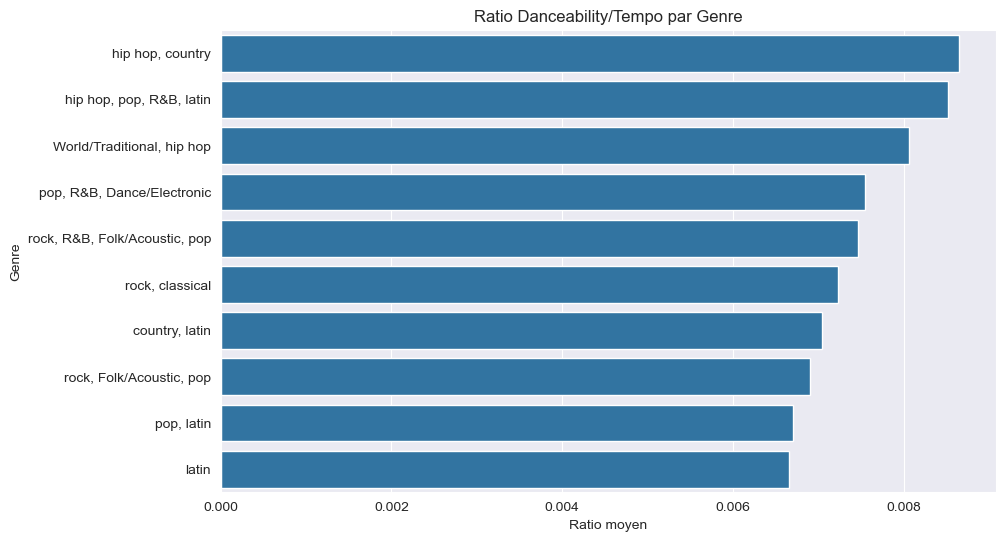

In [78]:
#ratios entre Speechiness et Energy
data['speechiness_energy_ratio'] = data['speechiness'] / data['energy']

# Afficher les ratios pour chaque genre
genre_ratios = data.groupby('track_genre')['speechiness_energy_ratio'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_ratios.values, y=genre_ratios.index, orient='h')
plt.title('Ratio Speechiness/Energy par Genre')
plt.xlabel('Ratio moyen')
plt.ylabel('Genre')
plt.show()

#ration entre Danceability et Tempo
data['danceability_tempo_ratio'] = data['danceability'] / data['tempo']

# Afficher les ratios pour chaque genre
genre_ratios = data.groupby('track_genre')['danceability_tempo_ratio'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_ratios.values, y=genre_ratios.index, orient='h')
plt.title('Ratio Danceability/Tempo par Genre')
plt.xlabel('Ratio moyen')
plt.ylabel('Genre')


In [79]:
#top 5 des morceaux "dancehall" les plus populaires
dancehall_data = data[data['track_genre'] == 'dancehall']
top_dancehall = dancehall_data.nlargest(5, 'popularity')
top_dancehall[['track_name', 'artists', 'popularity', 'album_name']]

KeyError: "['album_name'] not in index"

In [145]:
#supprime les doublons si l'artist et le track_name sont les mêmes
data = data.drop_duplicates(subset=['artists', 'track_name'])